Penerapan SARSA pada Frozen lake Environment

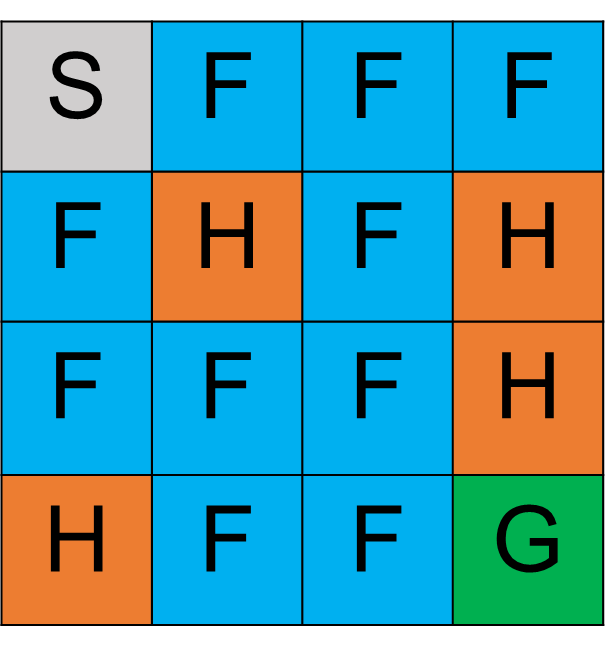

Link refrensi code: https://gist.github.com/DataWraith/00a8a834f1e07f713844e549430ad314

In [ ]:
import gym
import numpy as np

In [ ]:
# This is a straightforwad implementation of SARSA for the FrozenLake OpenAI
# Gym testbed. I wrote it mostly to make myself familiar with the OpenAI gym;
# the SARSA algorithm was implemented pretty much from the Wikipedia page alone.

env = gym.make("FrozenLake-v0")

alpha = 0.4
gamma = 0.999



In [ ]:
def choose_action(observation):
    return np.argmax(q_table[observation])

q_table = dict([(x, [1, 1, 1, 1]) for x in range(16)])
score = []



In [ ]:
for i in range(10000):
    observation = env.reset()
    action = choose_action(observation)

    prev_observation = None
    prev_action      = None

    t = 0

    for t in range(2500):
        observation, reward, done, info = env.step(action)

        action = choose_action(observation)

        if not prev_observation is None:
            q_old = q_table[prev_observation][prev_action]
            q_new = q_old
            if done:
                q_new += alpha * (reward - q_old)
            else:
                q_new += alpha * (reward + gamma * q_table[observation][action] - q_old)

            new_table = q_table[prev_observation]
            new_table[prev_action] = q_new
            q_table[prev_observation] = new_table

        prev_observation = observation
        prev_action = action

        if done:
            if len(score) < 100:
                score.append(reward)
            else:
                score[i % 100] = reward

            print("Episode {} finished after {} timesteps with r={}. Running score: {}".format(i, t, reward, np.mean(score)))
            break